## Ex. 1-1)  Visualize the color channels
Each pixel has intensity values for red, green and blue channels. Please make these 3-channel values visible, and also show intensity (gray-scale) image.

| Red  | Green | Blue | Intensity | 
| ---- | ---- | ---- | ---- | 
| <img src="fig/tri_r.png"> | <img src="fig/tri_g.png"> | <img src="fig/tri_b.png"> | <img src="fig/tri_sum.png"> |


The intensity image produced in the example code is different from the greyscale image obtained by the following code. 
```
test = Image.open(in_img_path).convert('LA')
test.save('grey.png')
```
so think about how the above function obitan the grey-scale image. Have a look at https://github.com/python-pillow/Pillow for reference.

### Type your code below.

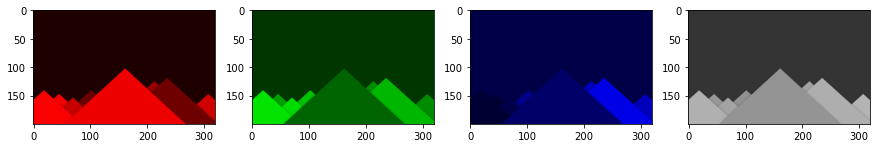

In [101]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/triangle.png"
img = Image.open(in_img_path)
pix = np.asarray(img)
redpix = np.zeros(pix.shape)
redpix[:,:,0] = pix[:,:,0]
red = Image.fromarray(np.uint8(redpix))

greenpix = np.zeros(pix.shape)
greenpix[:,:,1] = pix[:,:,1]
green = Image.fromarray(np.uint8(greenpix))

bluepix = np.zeros(pix.shape)
bluepix[:,:,2] = pix[:,:,2]
blue = Image.fromarray(np.uint8(bluepix))

greypix = np.sum(pix, axis=2) / 3
greypix = np.expand_dims(greypix, axis=2)
greypix = np.concatenate((greypix, greypix, greypix), axis=2)
# print (np.uint8(greypix))
grey = Image.fromarray(np.uint8(greypix))
# grey = img.convert('LA')

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,4,1)
plt.imshow(red)

fig.add_subplot(1,4,2)
plt.imshow(green)

fig.add_subplot(1,4,3)
plt.imshow(blue)

fig.add_subplot(1,4,4)
plt.imshow(grey)

# When translating a color image to greyscale (mode "L"),
# the library uses the ITU-R 601-2 luma transform::
#        L = R * 299/1000 + G * 587/1000 + B * 114/1000

Example code:

In [54]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/triangle.png"
img = Image.open(in_img_path)
pix = np.asarray(img)

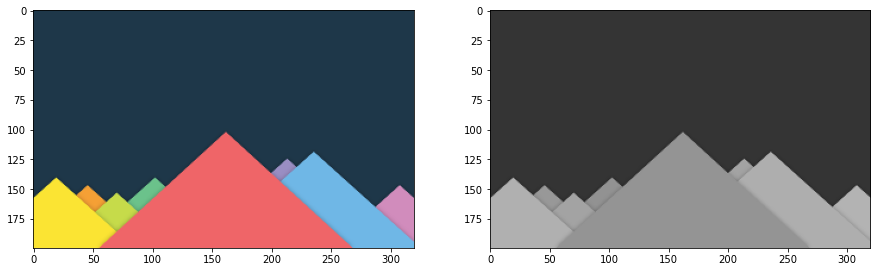

In [87]:
# Make color channel images
chan = {
  0: 'r',
  1: 'g',
  2: 'b'
}

for i in [0,1,2]:
    channel_visualize = pix.copy()
    channel_visualize.fill(0)
    channel_visualize[:,:,i] = pix[:,:,i] 
    channel_visualize = Image.fromarray(channel_visualize)
    channel_visualize.save("color_"+chan[i]+".png")
    #imgplot = plt.imshow(channel_visualize)

# Make intensity image
red = np.float32(pix[:,:,0])
green = np.float32(pix[:,:,1])
blue = np.float32(pix[:,:,2])
gray = np.zeros(pix.shape,dtype=np.float32)

for i in range(0,3):    
    gray[:,:,i] = (red + green + blue)/3

grays = Image.fromarray(np.uint8(gray))
grays.save("sum.png")


# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(2,2,1)
plt.imshow(img)

# display the new image
fig.add_subplot(2,2,2)
plt.imshow(grays)

plt.show(block=True)